In [94]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

print("Database created and connected!")

Database created and connected!


In [95]:
cursor = connection.cursor()

print("Cursor created!")

Cursor created!


In [96]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT ,
    last_name TEXT
)
''')

print("Student table created!")


Student table created!


In [97]:
cursor.close()

print("Cursor closed!")


Cursor closed!


In [98]:

cursor = connection.cursor()

print("Cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT ,
    last_name TEXT
)
''')

print("Student table created!")

Cursor created!
Student table created!


In [99]:


cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

print("Grades table created!")


Grades table created!


In [113]:
student_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', student_data)

connection.commit()

print("Data inserted into the students table!")


IntegrityError: UNIQUE constraint failed: students.student_id

In [101]:
grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 91),
    (8, 3, 'English', 98),
    (9, 3, 'History', 99),
    (10, 4, 'Math', 66),
    (11, 4, 'English', 75),
    (12, 4, 'History', 80),
    (13, 5, 'Math', 83),
    (14, 5, 'English', 89),
    (15, 5, 'History', 87)
]

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

connection.commit()

print("Data inserted into the grades table!")


IntegrityError: UNIQUE constraint failed: grades.grade_id

In [102]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("Students name and Grade:")
for row in joined_data:
    print(row)


Students name and Grade:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'English', 98)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 66)
('David', 'Brown', 'English', 75)
('David', 'Brown', 'History', 80)
('Eve', 'Davis', 'Math', 83)
('Eve', 'Davis', 'English', 89)
('Eve', 'Davis', 'History', 87)


In [103]:
    cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ''')

    avg_grades = cursor.fetchall()

    print("Student Names and Average Grades:")
    for row in avg_grades:
        print(row)


Student Names and Average Grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 96.0)
('David', 'Brown', 73.66666666666667)
('Eve', 'Davis', 86.33333333333333)


In [104]:

    cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY average_grade DESC
    LIMIT 1
    ''')

    top_student = cursor.fetchall()

    print("Top Student by Average Grade:")
    for row in top_student:
        print(row)


Top Student by Average Grade:
('Carol', 'White', 96.0)


In [105]:
    cursor.execute('''
    SELECT AVG(grades.grade) AS average_math_grade
    FROM grades
    WHERE grades.subject = 'Math'
    ''')

    math_grade = cursor.fetchone()

    print("Average Math Grade")
    for row in math_grade:
        print(row)


Average Math Grade
83.4


In [106]:
    cursor.execute('''
    SELECT AVG(grades.grade) AS average_math_grade
    FROM grades
    WHERE grades.subject = 'Math'
    ''')

    math_grade = cursor.fetchone()

    print("Average Math Grade")
    for row in math_grade:
        print(row)

Average Math Grade
83.4


In [107]:
    cursor.execute('''
    SELECT DISTINCT students.first_name, students.last_name
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90
    ''')

    above_90 = cursor.fetchall()

    print ("Students with a grade above 90")
    for row in above_90:
        print(row)



Students with a grade above 90
('Alice', 'Johnson')
('Carol', 'White')


In [108]:
import pandas as pd

df_students = pd.read_sql_query('SELECT * FROM students', connection)


df_students.head()



,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [109]:
df_grades = pd.read_sql_query('SELECT * FROM grades', connection)


df_grades.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [110]:
df_combined_data = pd.read_sql_query('''
SELECT students.student_id, students.first_name, students.last_name, grades.grade_id, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)

df_combined_data.head(6)

,student_id,first_name,last_name,grade_id,subject,grade
0,1,Alice,Johnson,1,Math,95
1,1,Alice,Johnson,2,English,88
2,1,Alice,Johnson,3,History,90
3,2,Bob,Smith,4,Math,82
4,2,Bob,Smith,5,English,76
5,2,Bob,Smith,6,History,85


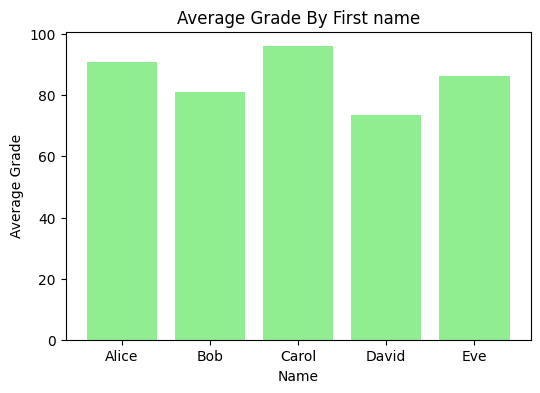

In [111]:
import matplotlib.pyplot as plt


df_avg_grades = pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''', connection)

df_avg_grades.head()

plt.figure(figsize=(6,4))
plt.bar(df_avg_grades['first_name'], df_avg_grades['average_grade'], color='lightgreen')
plt.xlabel('Name')
plt.ylabel('Average Grade')
plt.title('Average Grade By First name')
plt.show()






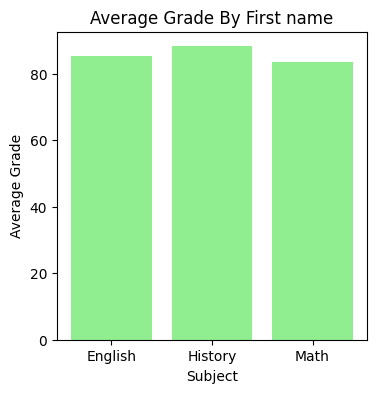

In [112]:
df_avg_subject_grades = pd.read_sql_query('''
SELECT subject, AVG(grade) AS average_grade
FROM grades
GROUP BY subject
''', connection)

df_avg_subject_grades.head()

plt.figure(figsize=(4,4))
plt.bar(df_avg_subject_grades['subject'], df_avg_subject_grades['average_grade'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade By First name')
plt.show()